In [1]:
!curl http://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   665  100   665    0     0   3778      0 --:--:-- --:--:-- --:--:--  3778
Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.14)
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/fastai/course-v3
   4383ced..daef515  master     -> origin/master
Updating 4383ced..daef515
Fast-forward
 docs/index.md | 1 +
 1 file changed, 1 insertion(+)


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from scipy.io import loadmat
import seaborn as sns

In [0]:
bs = 16 #64

In [5]:
images_url = 'http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers'
path = untar_data(images_url); path

PosixPath('/content/data/102flowers')

In [6]:
labels_url = 'http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat'
labels_path = Path('/content/data/102flowers.mat')
download_url(labels_url, labels_path); labels_path

PosixPath('/content/data/102flowers.mat')

In [7]:
mat = loadmat(labels_path.as_posix()); mat['labels']

array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)

In [8]:
labels = [str(l) for l in mat['labels'][0]]; labels[:5]

['77', '77', '77', '77', '77']

Let's plot the distribution of flower categories to have clue on the most popular and rare ones.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
No handles with labels found to put in legend.


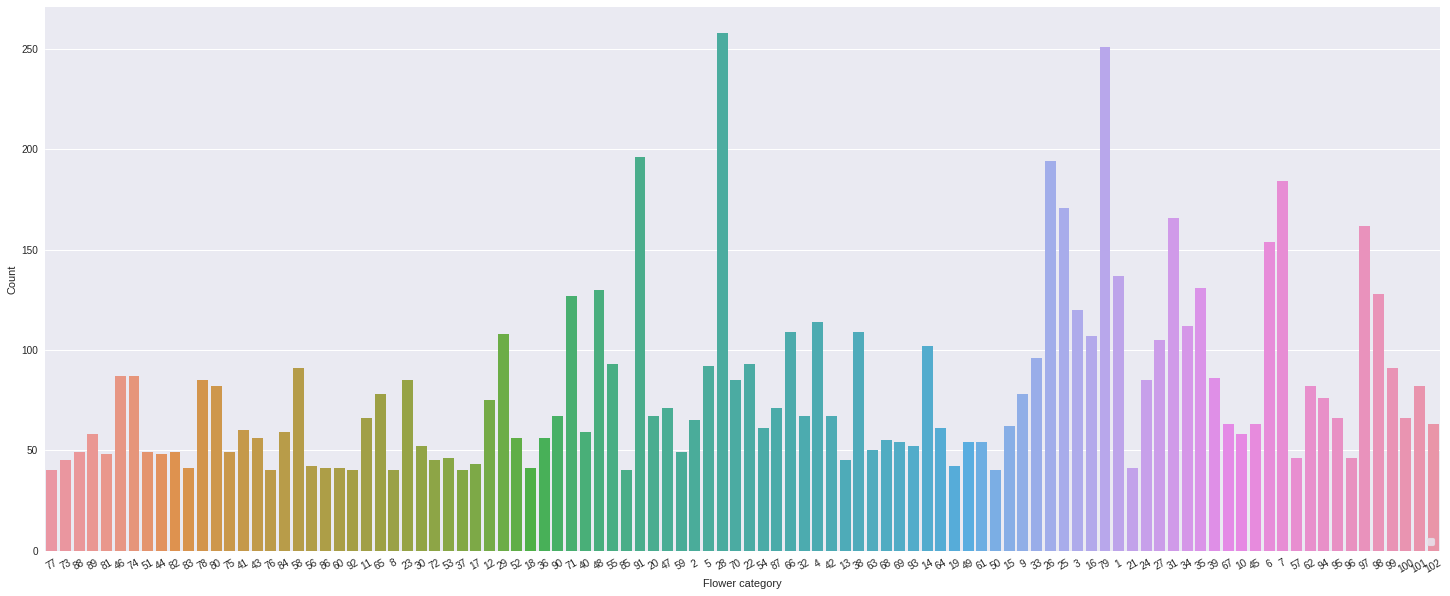

In [155]:
distrib = {}
for l in labels:
    if l not in distrib:
        distrib[l] = 0
    distrib[l] = distrib[l] + 1

df = pd.DataFrame([list(distrib.values())], columns=list(distrib.keys()))

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(25, 10))
# Plot the total count of appearance for each category
g = sns.barplot(y=list(distrib.values()), x=list(distrib.keys()))
# rotate x axis labels
g.set_xticklabels(labels= df.columns, rotation=30)
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Count", xlabel="Flower category")
sns.despine(left=True, bottom=True)

In [0]:
path_img = path.parent/'jpg'

In [10]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/content/data/jpg/image_03214.jpg'),
 PosixPath('/content/data/jpg/image_03658.jpg'),
 PosixPath('/content/data/jpg/image_07369.jpg'),
 PosixPath('/content/data/jpg/image_07969.jpg'),
 PosixPath('/content/data/jpg/image_05915.jpg')]

Plot a subset of the images to have a sense of there shapes

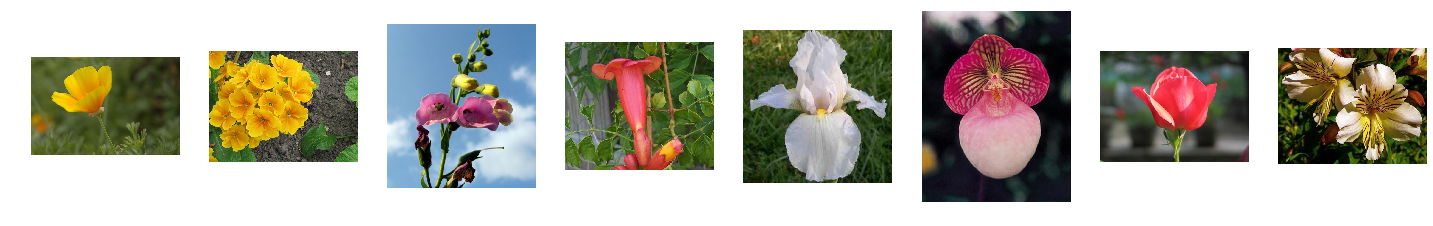

In [70]:
_,axs = plt.subplots(1,8,figsize=(25,4))
for i,ax in enumerate(axs): 
    img = open_image(fnames[i])
    img.show(ax=ax) #img.show(ax=ax, title=f'Copy {i+1}')
    #print(img.data.shape)

In [11]:
len(fnames), len(labels)

(8189, 8189)

In [0]:
data = ImageDataBunch.from_lists(path, fnames, labels, ds_tfms=get_transforms(), size=224, bs=bs)
data.normalize(imagenet_stats)

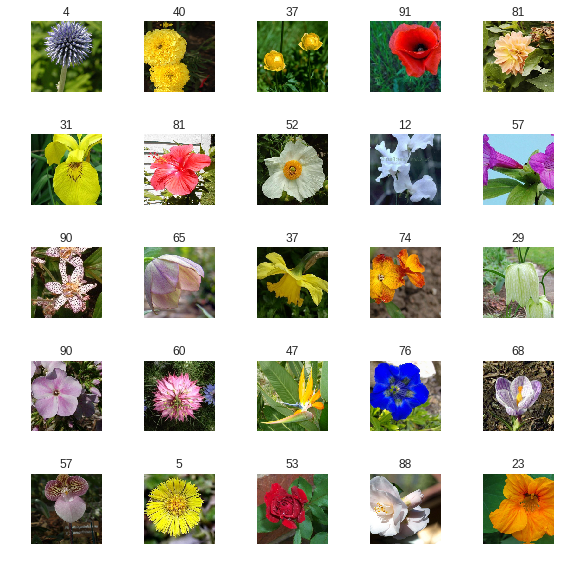

In [77]:
data.show_batch(rows=5, figsize=(8,8))

In [79]:
print(data.classes)
len(data.classes),data.c

['77', '73', '88', '89', '81', '46', '74', '51', '44', '82', '83', '78', '80', '75', '41', '43', '76', '84', '58', '56', '86', '60', '92', '11', '65', '8', '23', '30', '72', '53', '37', '17', '12', '29', '52', '18', '36', '90', '71', '40', '48', '55', '85', '91', '20', '47', '59', '2', '5', '28', '70', '22', '54', '87', '66', '32', '4', '42', '13', '38', '63', '68', '69', '93', '14', '64', '19', '49', '61', '50', '15', '9', '33', '26', '25', '3', '16', '79', '1', '21', '24', '27', '31', '34', '35', '39', '67', '10', '45', '6', '7', '57', '62', '94', '95', '96', '97', '98', '99', '100', '101', '102']


(102, 102)

In [0]:
learn = ConvLearner(data, models.resnet34, metrics=error_rate)

In [81]:
learn.fit_one_cycle(4)

Total time: 10:14
epoch  train_loss  valid_loss  error_rate
1      5.139985    4.761954    0.987164    (02:36)
2      4.790262    4.701030    0.979829    (02:34)
3      4.476229    4.691042    0.979218    (02:33)
4      4.200466    4.691162    0.979218    (02:31)



In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

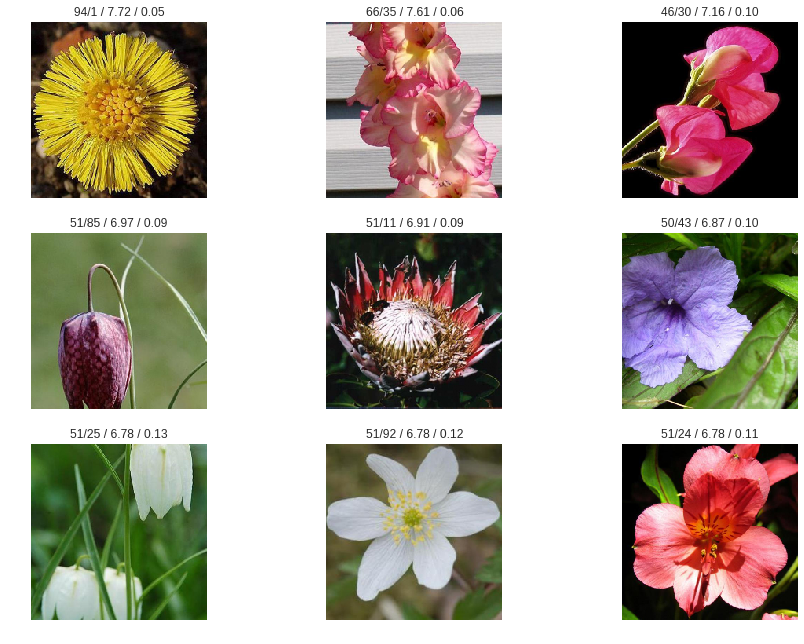

In [84]:
interp.plot_top_losses(9, figsize=(15,11))

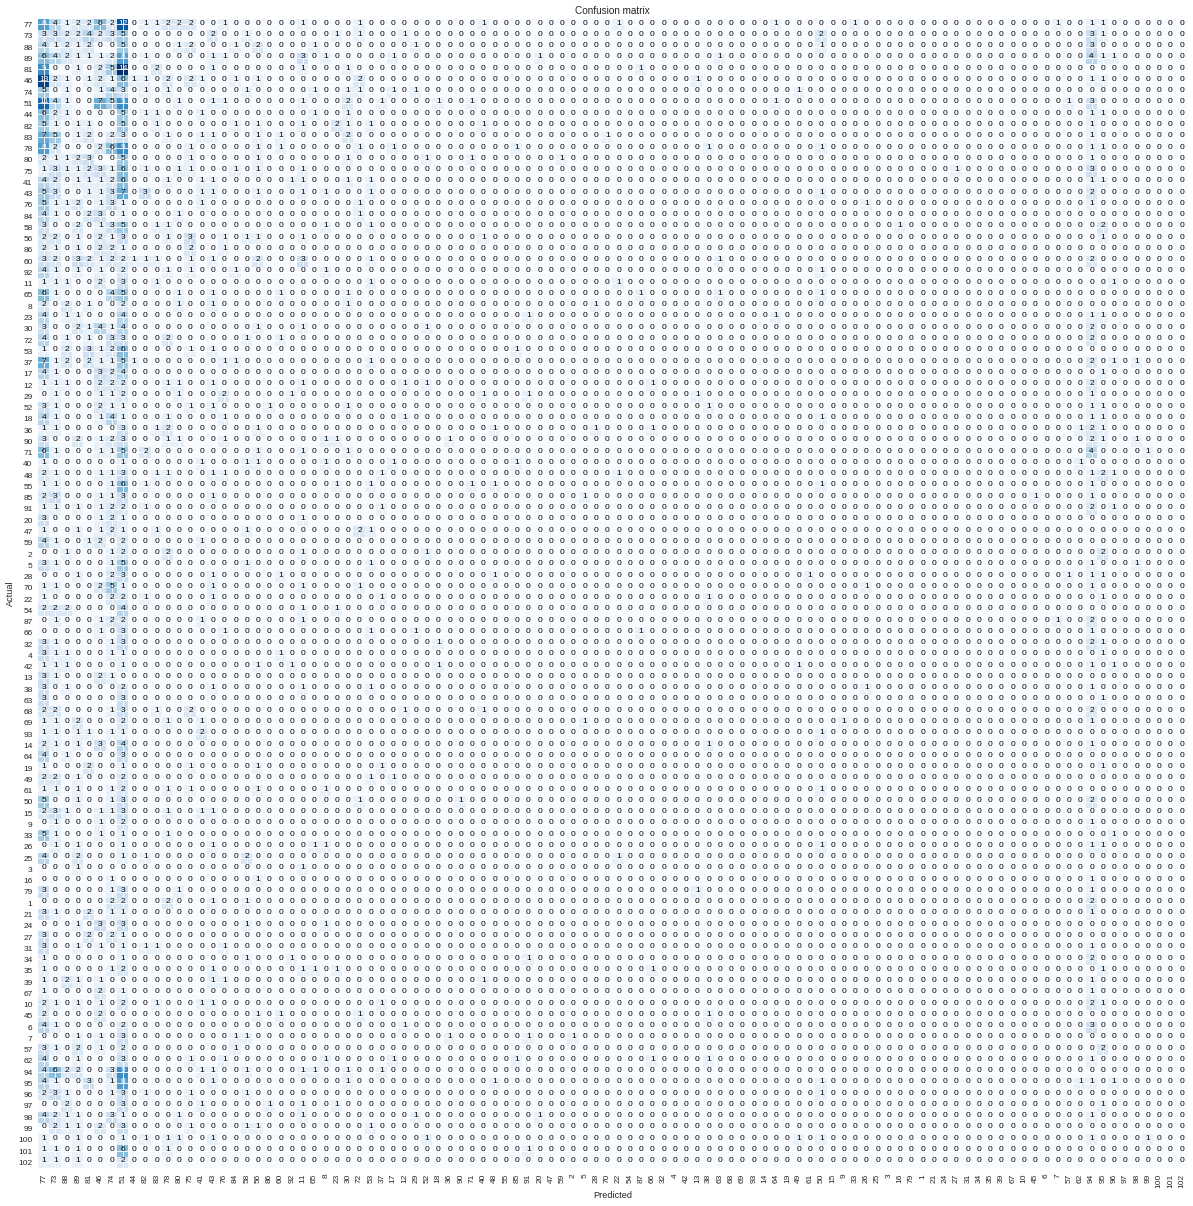

In [86]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=60)

In [87]:
interp.most_confused(min_val=2)

[('81', '51', 14),
 ('46', '77', 13),
 ('77', '51', 12),
 ('51', '77', 11),
 ('81', '77', 9),
 ('78', '51', 9),
 ('94', '51', 9),
 ('89', '51', 8),
 ('78', '77', 8),
 ('95', '51', 8),
 ('51', '46', 7),
 ('83', '77', 7),
 ('43', '51', 7),
 ('37', '77', 7),
 ('77', '46', 6),
 ('89', '77', 6),
 ('46', '51', 6),
 ('44', '77', 6),
 ('78', '74', 6),
 ('75', '51', 6),
 ('41', '51', 6),
 ('65', '77', 6),
 ('53', '51', 6),
 ('71', '77', 6),
 ('55', '51', 6),
 ('94', '73', 6),
 ('101', '51', 6),
 ('73', '51', 5),
 ('88', '51', 5),
 ('81', '74', 5),
 ('74', '77', 5),
 ('51', '74', 5),
 ('44', '51', 5),
 ('82', '77', 5),
 ('82', '51', 5),
 ('83', '73', 5),
 ('80', '51', 5),
 ('43', '77', 5),
 ('76', '77', 5),
 ('58', '51', 5),
 ('65', '51', 5),
 ('37', '51', 5),
 ('71', '51', 5),
 ('5', '51', 5),
 ('70', '74', 5),
 ('50', '77', 5),
 ('33', '77', 5),
 ('77', '73', 4),
 ('73', '81', 4),
 ('88', '77', 4),
 ('89', '73', 4),
 ('89', '94', 4),
 ('51', '73', 4),
 ('41', '77', 4),
 ('84', '77', 4),
 ('92'

Let's try to find a good learning rate slice

In [88]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


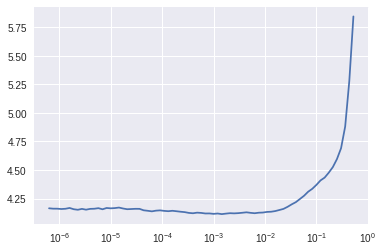

In [89]:
learn.recorder.plot()

In [91]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-6, 1e-3))

Total time: 21:00
epoch  train_loss  valid_loss  error_rate
1      2.709790    5.458967    0.984719    (02:40)
2      2.661998    5.569498    0.984108    (02:38)
3      2.546748    5.700339    0.983496    (02:37)
4      2.363964    5.859702    0.982274    (02:37)
5      2.127904    6.052469    0.982274    (02:36)
6      1.910503    6.106037    0.983496    (02:37)
7      1.760798    6.104397    0.982274    (02:38)
8      1.696391    6.164757    0.982274    (02:35)



Impression, it's stuck on a local minimum! no improvements!

**Training: resnet50**
Try the big guns, hoping for better performance

In [0]:
data = ImageDataBunch.from_lists(path, fnames, labels, ds_tfms=get_transforms(), size=224, bs=bs)
data.normalize(imagenet_stats)

In [0]:
learn = ConvLearner(data, models.resnet50, metrics=error_rate)

In [14]:
learn.fit_one_cycle(10, max_lr=slice(1e-3))

Total time: 30:58
epoch  train_loss  valid_loss  error_rate
1      5.143882    4.833019    0.985330    (03:08)
2      4.918839    4.791797    0.980440    (03:06)
3      4.749866    4.747269    0.976773    (03:01)
4      4.577477    4.718012    0.975550    (03:06)
5      4.449985    4.724235    0.971883    (03:04)
6      4.291201    4.759896    0.979218    (03:06)
7      4.113739    4.790433    0.975550    (03:08)
8      3.995913    4.814462    0.972494    (03:01)
9      3.880915    4.824159    0.976773    (03:05)
10     3.836075    4.842245    0.981051    (03:09)



In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [16]:
interp.most_confused(min_val=2)

[('89', '51', 8),
 ('81', '51', 7),
 ('77', '51', 6),
 ('88', '51', 6),
 ('46', '51', 6),
 ('74', '51', 6),
 ('51', '89', 6),
 ('80', '51', 6),
 ('73', '77', 5),
 ('46', '77', 5),
 ('44', '51', 5),
 ('82', '77', 5),
 ('78', '77', 5),
 ('65', '51', 5),
 ('8', '77', 5),
 ('50', '51', 5),
 ('77', '89', 4),
 ('77', '74', 4),
 ('73', '88', 4),
 ('88', '89', 4),
 ('81', '77', 4),
 ('46', '89', 4),
 ('46', '95', 4),
 ('74', '77', 4),
 ('74', '89', 4),
 ('51', '77', 4),
 ('51', '81', 4),
 ('51', '74', 4),
 ('83', '77', 4),
 ('83', '46', 4),
 ('78', '46', 4),
 ('41', '51', 4),
 ('43', '89', 4),
 ('56', '51', 4),
 ('65', '77', 4),
 ('28', '51', 4),
 ('70', '51', 4),
 ('64', '46', 4),
 ('94', '77', 4),
 ('94', '73', 4),
 ('94', '89', 4),
 ('77', '73', 3),
 ('77', '81', 3),
 ('77', '56', 3),
 ('77', '95', 3),
 ('73', '89', 3),
 ('73', '81', 3),
 ('73', '46', 3),
 ('73', '94', 3),
 ('88', '46', 3),
 ('89', '76', 3),
 ('81', '74', 3),
 ('46', '41', 3),
 ('51', '12', 3),
 ('44', '77', 3),
 ('82', '51

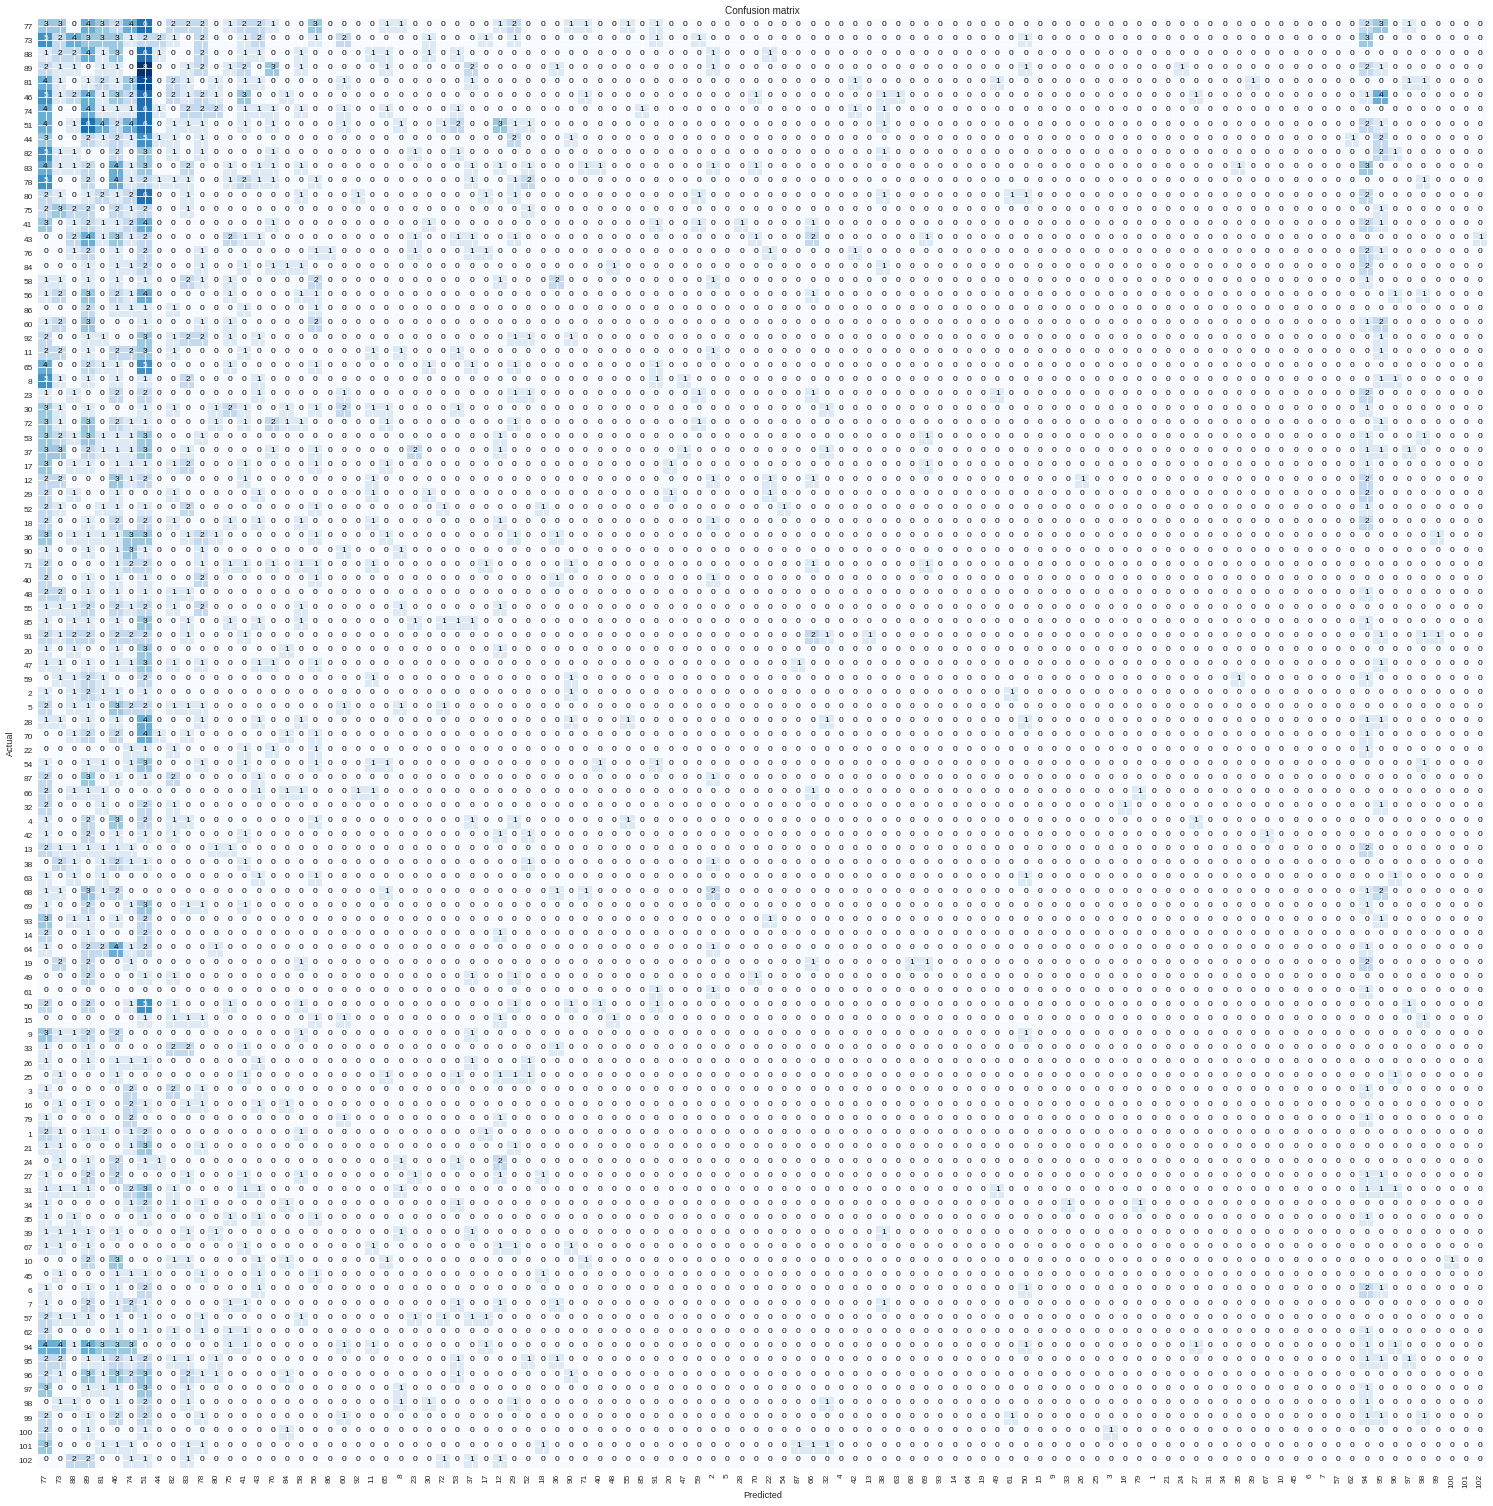

In [17]:
interp.plot_confusion_matrix(figsize=(25,25), dpi=60)